id: ID
annual_income: 연간 소득
debt_to_income_ratio: 부채 대 소득 비율
credit_score: 신용점수
loan_amount	: 대출 금액
interest_rate: 이자율
gender: 성별 (Female 여성 /Male 남성/Other)
marital_status: 결혼 상태 (Single 미혼/ Married 기혼/ Other)
education_level: 교육 수준 (Bachelor's 학사/ High School 고등학교/ Other)
employment_status: 고용 상태 (Employed 고용됨/ Unemployed/ Other)
loan_purpose: 대출목적	
(Debt consolidation: 부채 통합/ Other 다른 이유/ Other 기타)
grade_subgrade: 등급_하위등급	(C3,C4,기타)

loan_paid_back: 대출상환 0_1

In [65]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [66]:
with zipfile.ZipFile("kaggle_1.zip", "r") as z:
    z.extractall("train")      
    z.extractall("test")

In [67]:
train = pd.read_csv("train/train.csv")
test = pd.read_csv("test/test.csv")
train

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0


In [68]:
col_1=['annual_income', 'debt_to_income_ratio', 'credit_score'
       , 'loan_amount', 'interest_rate',	'loan_paid_back'] # 수치형

col_2=['gender',	'marital_status',	'education_level',	'employment_status',	
       'loan_purpose',	'grade_subgrade'] # 범주형

In [69]:
train.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

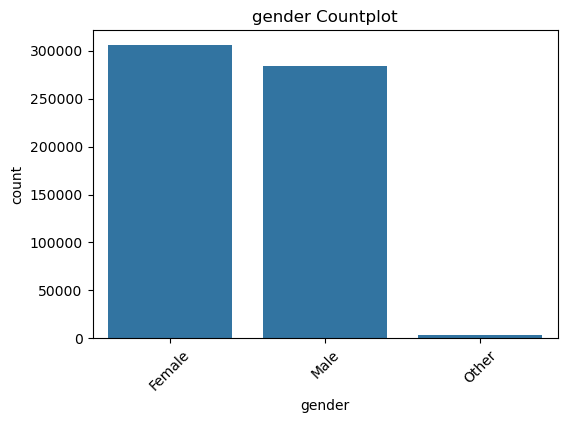

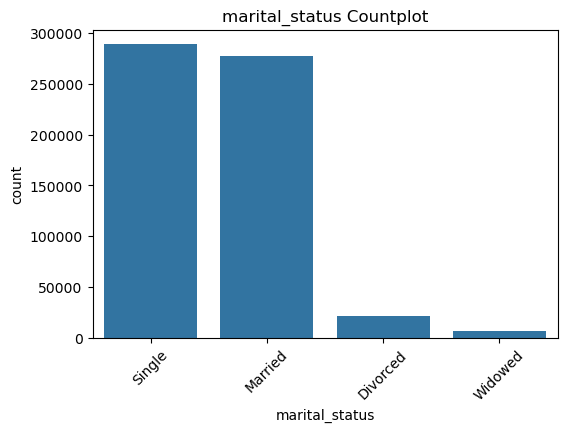

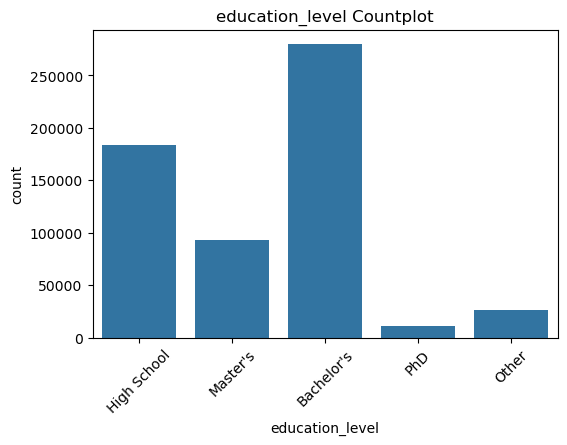

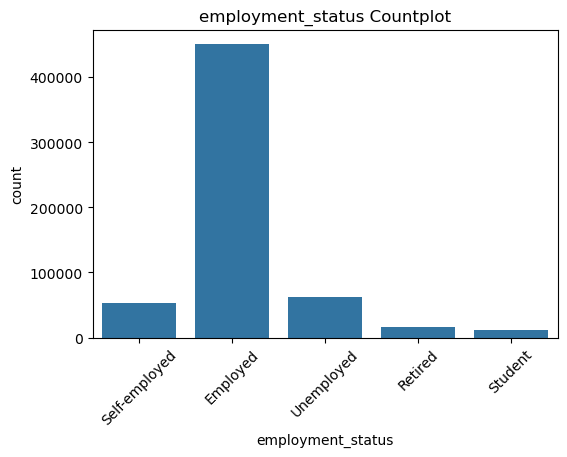

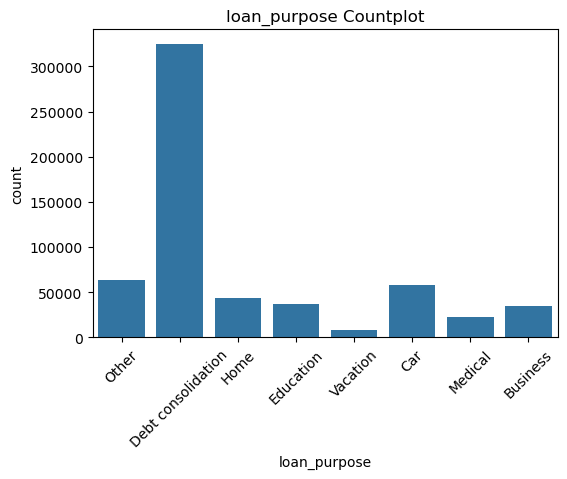

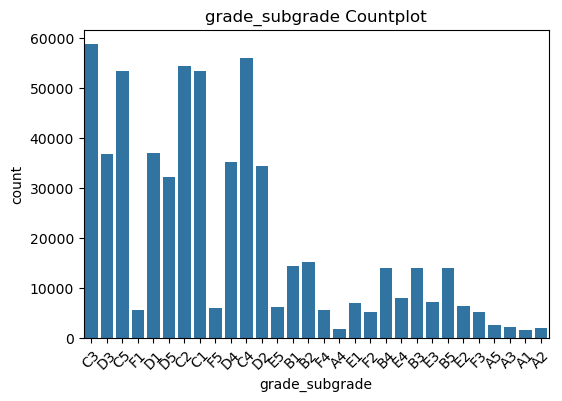

In [70]:
for c in col_2:
    plt.figure(figsize=(6,4))
    sns.countplot(x=train[c])
    plt.xticks(rotation=45)
    plt.title(f"{c} Countplot")
    plt.show()


In [71]:
# gender 전처리
#train = train[train['gender'] != 'Other']

# marital_status전처리
#rare = ['Divorced', 'Widowed']
#train['marital_status'] = train['marital_status'].replace(
#    rare, 'Other')

# education_level 전처리
#rare = ['PhD', 'Other']
#train['education_level'] = train['education_level'].replace(rare, 'Other')

# employment_status 전처리
#rare = ['Retired', 'Student']
#train['employment_status'] = train['employment_status'].replace(rare, 'Other')

# loan_purpose 전처리
#rare = ['Vacation', 'Other']
#train['loan_purpose'] = train['loan_purpose'].replace(rare, 'Other')


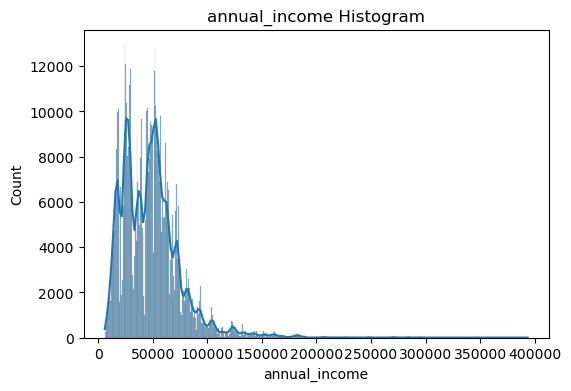

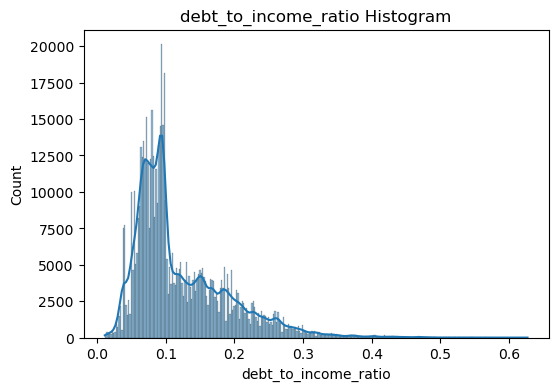

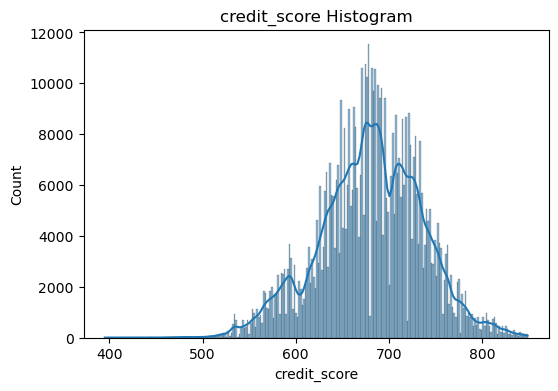

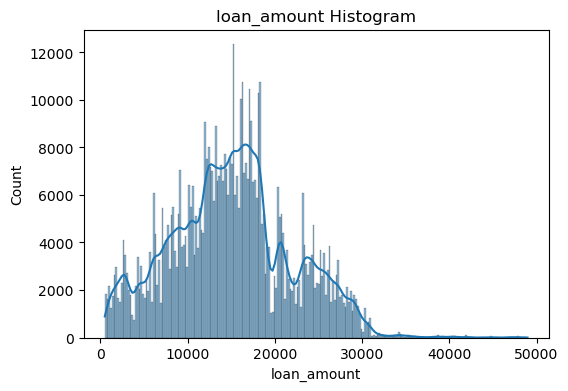

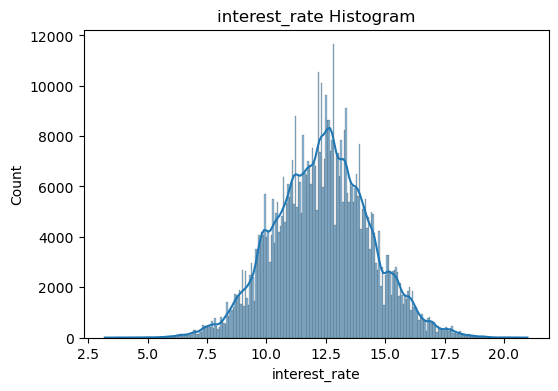

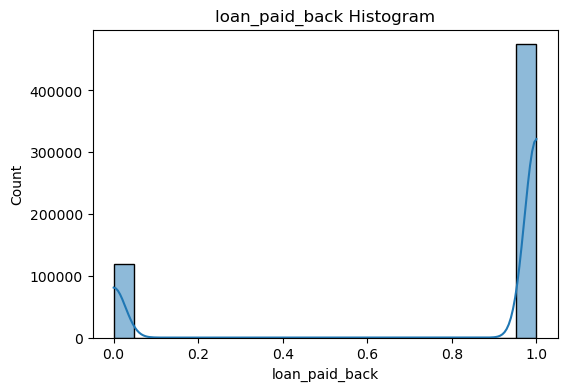

In [72]:
for c in col_1:  
    plt.figure(figsize=(6,4))
    sns.histplot(train[c], kde=True)   # kde=True → 분포 곡선 포함
    plt.title(f"{c} Histogram")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

In [73]:
# annual_income 로그1p변환
train['debt_to_income_ratio_log'] = np.log1p(train['debt_to_income_ratio'])
train.drop(columns=['debt_to_income_ratio'], inplace=True)
 
# #debt_to_income_ratio
scaler = StandardScaler()
train['credit_score'] = scaler.fit_transform(train[['credit_score']])
  
# credit_score -> 표준정규분포처럼 스케일링
train['credit_score'] = scaler.fit_transform(train[['credit_score']])

 
# loan_amount 로그1p변환
train['loan_amount_log'] = np.log1p(train['loan_amount'])
train.drop(columns=['loan_amount'], inplace=True)
 
#interest_rate
train['interest_rate'] = scaler.fit_transform(train[['interest_rate']])

In [74]:
train

,id,annual_income,credit_score,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back,debt_to_income_ratio_log,loan_amount_log
0,0,29367.99,0.993849,0.653899,Female,Single,High School,Self-employed,Other,C3,1.0,0.080658,7.835745
1,1,22108.02,-0.810394,0.280571,Male,Married,Master's,Employed,Debt consolidation,D3,0.0,0.153579,8.432528
2,2,49566.20,0.236067,-1.292385,Male,Single,High School,Employed,Debt consolidation,C5,1.0,0.092579,9.741330
3,3,46858.25,-2.668764,1.863482,Female,Single,High School,Employed,Debt consolidation,F1,1.0,0.062975,8.451797
4,4,25496.70,-0.287163,-1.068388,Male,Married,High School,Employed,Other,D1,1.0,0.051643,9.407996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593989,593989,23004.26,0.398449,-0.714971,Female,Single,High School,Employed,Business,C3,1.0,0.141500,9.950341
593990,593990,35289.43,-2.199661,1.126781,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0,0.099845,8.088942
593991,593991,47112.64,-0.106739,0.882873,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0,0.069526,6.835475
593992,593992,76748.44,1.066019,-1.237630,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0,0.064851,9.698393


In [75]:
col_1=['annual_income', 'debt_to_income_ratio_log', 'credit_score' , 'loan_amount_log', 'interest_rate', 'loan_paid_back']
#col_2=['gender',	'marital_status',	'education_level',	'employment_status',	
#       'loan_purpose']

In [76]:
#범주형 자료=> 라벨인코더
#le = LabelEncoder()

#for col in col_2:
#    train[col] = le.fit_transform(train[col])

In [77]:
train=train.drop('id',axis=1)

In [78]:
train

,annual_income,credit_score,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back,debt_to_income_ratio_log,loan_amount_log
0,29367.99,0.993849,0.653899,Female,Single,High School,Self-employed,Other,C3,1.0,0.080658,7.835745
1,22108.02,-0.810394,0.280571,Male,Married,Master's,Employed,Debt consolidation,D3,0.0,0.153579,8.432528
2,49566.20,0.236067,-1.292385,Male,Single,High School,Employed,Debt consolidation,C5,1.0,0.092579,9.741330
3,46858.25,-2.668764,1.863482,Female,Single,High School,Employed,Debt consolidation,F1,1.0,0.062975,8.451797
4,25496.70,-0.287163,-1.068388,Male,Married,High School,Employed,Other,D1,1.0,0.051643,9.407996
...,...,...,...,...,...,...,...,...,...,...,...,...
593989,23004.26,0.398449,-0.714971,Female,Single,High School,Employed,Business,C3,1.0,0.141500,9.950341
593990,35289.43,-2.199661,1.126781,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0,0.099845,8.088942
593991,47112.64,-0.106739,0.882873,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0,0.069526,6.835475
593992,76748.44,1.066019,-1.237630,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0,0.064851,9.698393


In [79]:
#from sklearn.model_selection import train_test_split

#X = train.drop('loan_paid_back', axis=1)   # 독립변수
#y = train['loan_paid_back']                # 종속변수

#X_train, X_valid, y_train, y_valid = train_test_split(
#    X, y,
#    test_size=0.2,        # 20%를 검증용으로 사용
#    random_state=42,      # 랜덤 고정
#    stratify=y            # y 비율 유지 (중요!)
#)

In [80]:
## 랜덤포레스트

#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, roc_auc_score

#model = RandomForestClassifier(
#    n_estimators=150,
#    max_depth=15,
#    min_samples_split=20,
#    n_jobs=-1,
#    random_state=42
#)

#model.fit(X_train, y_train)

#pred = model.predict(X_valid)
#proba = model.predict_proba(X_valid)[:, 1]

#print("Accuracy:", accuracy_score(y_valid, pred))
#print("AUC:", roc_auc_score(y_valid, proba))


In [81]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import numpy as np

X = train.drop(columns=["loan_paid_back"])
y = train["loan_paid_back"]

cat_features = ['gender','marital_status','education_level',
                'employment_status','loan_purpose','grade_subgrade']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_scores = []

for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    print(f"\n===== Fold {fold+1} =====")

    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]


===== Fold 1 =====

===== Fold 2 =====

===== Fold 3 =====

===== Fold 4 =====

===== Fold 5 =====


In [82]:
#RandomForest는 각 트리를 독립적으로 학습 ===> 평균내기 때문에 “복잡한 패턴”을 잘 못 잡는 경우 많음
#CatBoost는 이전 트리의 오류를 보완하며 순차적으로 학습 ===> 훨씬 더 정교한 패턴을 잡음
#부스팅은 트리 순차적인 것은  동일하지만, 범주형 처리를 잘 하도록 개선된 모델임

from catboost import CatBoostClassifier

cat_features = ['gender', 'marital_status', 'education_level', 
                'employment_status', 'loan_purpose', 'grade_subgrade']

model = CatBoostClassifier(
    iterations=2000,
    depth=8,
    learning_rate=0.03,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=200
)

model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_valid, y_valid))


0:	test: 0.9018346	best: 0.9018346 (0)	total: 120ms	remaining: 3m 59s


KeyboardInterrupt: 

In [ ]:
#훈련 데이터 양을 늘려갈 때, "훈련 정확도, 검증 정확도가 어떻게 변화하는지"

from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
valid_mean = valid_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Train Accuracy')
plt.plot(train_sizes, valid_mean, label='Validation Accuracy')
plt.xlabel('Training Size')
# x축: 모델이 학습한 데이터 양 
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# 머신러닝에서 특정 패턴에 과적합되던 부분이 사라지면서 
# 정확도가 호폭 하락할 수 있음
#트리 기반 모델은 일정 이상의 데이터가 들어오면 성능이 거의 변하지 않음

#과적합의 판단 여부 확인 
# 1. val<<train                train=0.910, val=0.895
# 2. 두 곡선 사이 차이가 크다      차이=0.015    -------심한 과적합은 아님.

#✔ Gap이 0.00 ~ 0.02 (0~2%)
#→ 정상, 과적합 아님

#✔ Gap이 0.02 ~ 0.05 (2~5%)
#→ 약한 과적합 (weak overfitting)

#✔ Gap이 0.05 ~ 0.10 (5~10%)
#→ 중간 수준 과적합

#✔ Gap이 0.10 이상 (10% 이상)
#→ 심한 과적합(strong overfitting)



Process LokyProcess-1:
Process LokyProcess-11:
Process LokyProcess-2:
Process LokyProcess-19:
Traceback (most recent call last):
  File "/home/suyou8022/anaconda3/envs/setting/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker
    r = call_item()
  File "/home/suyou8022/anaconda3/envs/setting/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py", line 291, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/home/suyou8022/anaconda3/envs/setting/lib/python3.10/site-packages/joblib/parallel.py", line 598, in __call__
    return [func(*args, **kwargs)
  File "/home/suyou8022/anaconda3/envs/setting/lib/python3.10/site-packages/joblib/parallel.py", line 598, in <listcomp>
    return [func(*args, **kwargs)
  File "/home/suyou8022/anaconda3/envs/setting/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 147, in __call__
    return self.function(*args, **kwargs)
  File "/home/suyou8022/anaconda3/envs

/home/suyou8022/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


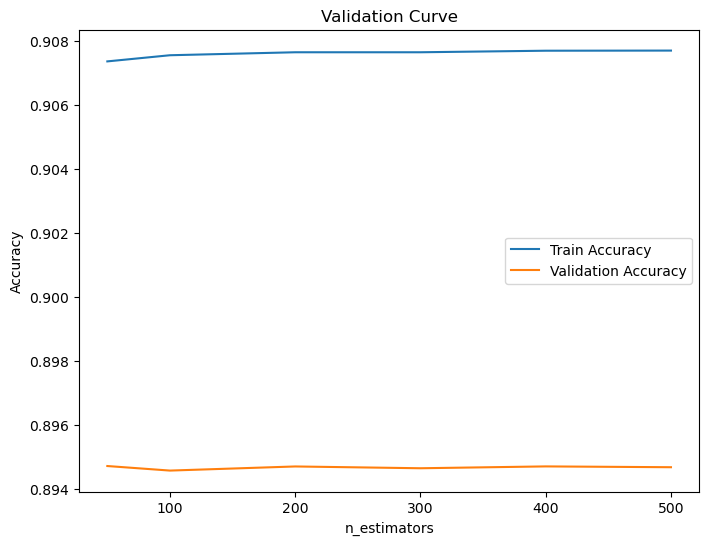

In [ ]:
#하이퍼파라미터를 변화시켰얼 때, "train vs validation 성능 비교"
#최적의 하이퍼파라미터 찾기 가능
from sklearn.model_selection import validation_curve

param_range = [50, 100, 200, 300, 400, 500]

train_scores, valid_scores = validation_curve(
    model,
    X, y,
    param_name="n_estimators",
    param_range=param_range,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
valid_mean = valid_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(param_range, train_mean, label='Train Accuracy')
plt.plot(param_range, valid_mean, label='Validation Accuracy')
plt.xlabel('n_estimators')
# x축: 모델 복잡도(트리 개수)
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.show()

# 두 정확도가 미세하게 증가/일정 ==> 트리 수를 늘려도 성능이 거의 변하지 않는다.
# 차이 또한 0.013 정도 => 트리 수를 늘려도 과적합 유발하지 않음
# 결론: 트리 수를 100~300정도로 줄임

In [ ]:
test

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1
...,...,...,...,...,...,...,...,...,...,...,...,...
254564,848558,92835.97,0.068,744,29704.00,13.48,Female,Single,Bachelor's,Employed,Debt consolidation,B2
254565,848559,48846.47,0.091,634,20284.33,9.58,Female,Married,High School,Employed,Debt consolidation,D4
254566,848560,20668.52,0.096,718,26387.55,9.00,Male,Single,Master's,Employed,Debt consolidation,C4
254567,848561,34105.09,0.094,739,11107.36,9.81,Male,Single,Bachelor's,Employed,Business,C2


In [ ]:
# test 전처리

In [ ]:
col_1=['annual_income', 'debt_to_income_ratio', 'credit_score'
       , 'loan_amount', 'interest_rate'] # 수치형
#col_2=['gender',	'marital_status',	'education_level',	'employment_status',	
#       'loan_purpose',	'grade_subgrade'] # 범주형

In [ ]:
# marital_status전처리
#rare = ['Divorced', 'Widowed']
#test['marital_status'] = test['marital_status'].replace(
#    rare, 'Other')

# education_level 전처리
#rare = ['PhD', 'Other']
#test['education_level'] = test['education_level'].replace(rare, 'Other')

# employment_status 전처리
#rare = ['Retired', 'Student']
#test['employment_status'] = test['employment_status'].replace(rare, 'Other')

# loan_purpose 전처리
#rare = ['Vacation', 'Other']
#test['loan_purpose'] = test['loan_purpose'].replace(rare, 'Other')


#grade_subgrade -> 타겟인코딩
#from category_encoders import TargetEncoder
#test['grade_subgrade'] = encoder.transform(test['grade_subgrade'])


# annual_income 로그1p변환
test['debt_to_income_ratio_log'] = np.log1p(test['debt_to_income_ratio'])
test.drop(columns=['debt_to_income_ratio'], inplace=True)
 
# #debt_to_income_ratio
scaler = StandardScaler()
test['credit_score'] = scaler.fit_transform(test[['credit_score']])
  
# credit_score -> 표준정규분포처럼 스케일링
test['credit_score'] = scaler.fit_transform(test[['credit_score']])

 
# loan_amount 로그1p변환
test['loan_amount_log'] = np.log1p(test['loan_amount'])
test.drop(columns=['loan_amount'], inplace=True)
 
#interest_rate
test['interest_rate'] = scaler.fit_transform(test[['interest_rate']])


In [ ]:
col_1=['annual_income', 'debt_to_income_ratio_log', 'credit_score' , 'loan_amount_log', 'interest_rate', 'loan_paid_back']
#col_2=['gender',	'marital_status',	'education_level',	'employment_status',	
#       'loan_purpose']

In [ ]:
#범주형 자료=> 라벨인코더
#le = LabelEncoder()
#for col in col_2:
#    test[col] = le.fit_transform(test[col])

# id 삭제
test=test.drop('id',axis=1)

In [ ]:
test

,annual_income,credit_score,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,debt_to_income_ratio_log,loan_amount_log
0,28781.05,-0.989459,1.178469,Female,Single,High School,Employed,Other,D5,0.047837,9.346829
1,46626.39,0.916193,0.246668,Female,Married,Master's,Employed,Other,C1,0.088926,9.648160
2,54954.89,-1.259127,0.464749,Male,Single,Bachelor's,Employed,Debt consolidation,D1,0.312619,8.242075
3,25644.63,-0.180456,-1.379028,Female,Single,Bachelor's,Employed,Debt consolidation,C3,0.104360,8.791075
4,25169.64,0.125167,0.221886,Female,Married,PhD,Employed,Business,C1,0.077887,9.781201
...,...,...,...,...,...,...,...,...,...,...,...
254564,92835.97,1.131927,0.558920,Female,Single,Bachelor's,Employed,Debt consolidation,B2,0.065788,10.299071
254565,48846.47,-0.845636,-1.374071,Female,Married,High School,Employed,Debt consolidation,D4,0.087095,9.917653
254566,20668.52,0.664503,-1.661542,Male,Single,Master's,Employed,Debt consolidation,C4,0.091667,10.180685
254567,34105.09,1.042038,-1.260074,Male,Single,Bachelor's,Employed,Business,C2,0.089841,9.315453


In [ ]:
test_pred_proba = model.predict_proba(test)[:, 1]   # 확률 예측
test_pred_label = model.predict(test)               # 라벨 예측

In [ ]:
#print("test rows:", len(test))
#print("submission rows:", len(submission))
#print("difference:", len(submission) - len(test))

test rows: 254569


NameError: name 'submission' is not defined

In [ ]:
import zipfile
import pandas as pd

# 1) sample_submission 불러오기
with zipfile.ZipFile("kaggle_1.zip", "r") as z:
    with z.open("sample_submission.csv") as f:
        submission = pd.read_csv(f)

# 2) 예측 넣기 (확률 예측)
submission['loan_paid_back'] = test_pred_proba

# 3) 제출 파일 저장
submission.to_csv("final_submission.csv", index=False)

print("final_submission.csv 생성 완료!")

final_submission.csv 생성 완료!
